# Cancer rates prediction based on data from USA goverment agency CDC (center for disease control)

## Aims:
#### +++ Exploring and visualising data
#### +++ Choosing the best parameters for OLS Regression model
#### +++ Evaluating chosen model

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import re
import sklearn.linear_model as lm
from sklearn import datasets, linear_model
from sklearn.preprocessing import PolynomialFeatures,StandardScaler,MinMaxScaler,PowerTransformer
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import GridSearchCV,train_test_split,TimeSeriesSplit
from statsmodels.tsa.arima_model import ARIMA
from sklearn import metrics
from statsmodels.stats.anova import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)
import warnings
import itertools

### Reading data and first look

In [2]:
data = pd.read_csv(r"C:\Users\szklarnia\Desktop\datascience\dane\cancer_reg.csv")


In [14]:
data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,binnedinc,medianage,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,"(61494.5, 125635]",39.3,...,NaN,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,"(48021.6, 51046.4]",33.0,...,53.8,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,"(48021.6, 51046.4]",45.0,...,43.5,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,"(42724.4, 45201]",42.8,...,40.3,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,"(48021.6, 51046.4]",48.3,...,43.9,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,"(45201, 48021.6]",44.2,...,54.9,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,"(48021.6, 51046.4]",30.4,...,53.3,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,"(51046.4, 54545.6]",30.9,...,52.6,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,"(48021.6, 51046.4]",39.0,...,56.3,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [33]:
data.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'binnedinc',
       'medianage', 'medianagemale', 'medianagefemale', 'geography',
       'avghouseholdsize', 'percentmarried', 'pctnohs18_24', 'pcths18_24',
       'pctsomecol18_24', 'pctbachdeg18_24', 'pcths25_over',
       'pctbachdeg25_over', 'pctemployed16_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctprivatecoveragealone', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone', 'pctwhite', 'pctblack',
       'pctasian', 'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

Descriptive statistics

In [4]:
data.describe()

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
count,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3.047000e+03,3047.000000,3047.000000,3047.000000,3047.000000,...,2438.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000,3047.000000
mean,606.338544,185.965868,178.664063,448.268586,47063.281917,1.026374e+05,16.878175,155.399415,45.272333,39.570725,...,48.453774,41.196324,36.252642,19.240072,83.645286,9.107978,1.253965,1.983523,51.243872,5.640306
std,1416.356223,504.134286,27.751511,54.560733,12040.090836,3.290592e+05,6.409087,529.628366,45.304480,5.226017,...,10.083006,9.447687,7.841741,6.113041,16.380025,14.534538,2.610276,3.517710,6.572814,1.985816
min,6.000000,3.000000,59.700000,201.300000,22640.000000,8.270000e+02,3.200000,0.000000,22.300000,22.400000,...,15.700000,13.500000,11.200000,2.600000,10.199155,0.000000,0.000000,0.000000,22.992490,0.000000
25%,76.000000,28.000000,161.200000,420.300000,38882.500000,1.168400e+04,12.150000,0.000000,37.700000,36.350000,...,41.000000,34.500000,30.900000,14.850000,77.296180,0.620675,0.254199,0.295172,47.763063,4.521419
50%,171.000000,61.000000,178.100000,453.549422,45207.000000,2.664300e+04,15.900000,0.000000,41.000000,39.600000,...,48.700000,41.100000,36.300000,18.800000,90.059774,2.247576,0.549812,0.826185,51.669941,5.381478
75%,518.000000,149.000000,195.200000,480.850000,52492.000000,6.867100e+04,20.400000,83.650776,44.000000,42.500000,...,55.600000,47.700000,41.550000,23.100000,95.451693,10.509732,1.221037,2.177960,55.395132,6.493677
max,38150.000000,14010.000000,362.800000,1206.900000,125635.000000,1.017029e+07,47.400000,9762.308998,624.000000,64.700000,...,78.900000,70.700000,65.100000,46.600000,100.000000,85.947799,42.619425,41.930251,78.075397,21.326165


## Exploratory analysis - let's ask some questions

### Does ethnicity affect mean cancer death rate?

BLACK vs OTHER

In [5]:
## first, lets check descriptive stats of black population percentage

data.pctblack.describe()

count    3047.000000
mean        9.107978
std        14.534538
min         0.000000
25%         0.620675
50%         2.247576
75%        10.509732
max        85.947799
Name: pctblack, dtype: float64

In [82]:
## dividing the data into 4 categories: less than 1% black, less than 10%, less than 50%, over 50%
categories = {}
categories["black_one"] = data[data.pctblack <= 1]
categories["black_ten"] = data[(data.pctblack > 1) & (data.pctblack <= 10)]
categories["black_fifty"] = data[(data.pctblack > 10) & (data.pctblack <=50)]
categories["black_over_fifty"] = data[data.pctblack > 50]

In [7]:
## checking avg deathrate for each category

for category in categories:
    result = categories[category].target_deathrate.mean()
    print(f"Mean death rate per 100000 inhabitants for category {category} is {result}")


Mean death rate per 100000 inhabitants for category black_one is 172.65918367346913
Mean death rate per 100000 inhabitants for category black_ten is 177.50414201183432
Mean death rate per 100000 inhabitants for category black_fifty is 186.77304347826086
Mean death rate per 100000 inhabitants for category black_over_fifty is 202.10416666666663


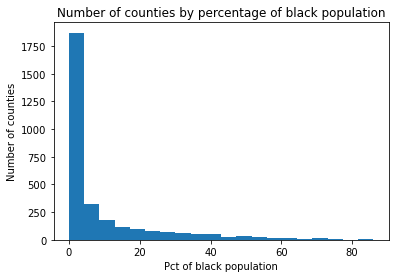

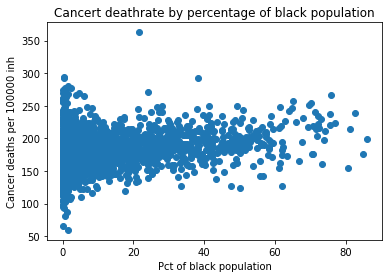

In [19]:
#histogram of black population percentage and cancer death rates by black pop. percentage
plt.hist(data.pctblack,bins=20)
plt.title("Number of counties by percentage of black population")
plt.xlabel("Pct of black population")
plt.ylabel("Number of counties")
plt.show()
plt.scatter(data.pctblack,data.target_deathrate)
plt.title("Cancert deathrate by percentage of black population")
plt.xlabel("Pct of black population")
plt.ylabel("Cancer deaths per 100000 inh")
plt.show()

In [8]:
## now let's check significance of differences

stats.levene(categories["black_one"],categories["black_ten"],categories["black_fifty"],categories["black_over_fifty"])

LeveneResult(statistic=17.314119263781524, pvalue=3.804543855636038e-11)

In [9]:
## unequal variance, performing kruskal wallis test

stats.kstest(categories["black_one"],categories["black_ten"],categories["black_fifty"],categories["black_over_fifty"])

KstestResult(statistic=0.10626735901461176, pvalue=5.238746602631572e-06)

In [10]:
## post hoc analysys, ttest between each group

t_results = {}

for category in categories:
    for category1 in categories:
        if category == category1:
            pass
        else:
            t_results[(category,category1)] = stats.ttest_ind(categories[category],categories[category1], equal_var=False)
            
t_results

{('black_one',
  'black_ten'): Ttest_indResult(statistic=-4.089858601857582, pvalue=4.4792420325032e-05),
 ('black_one',
  'black_fifty'): Ttest_indResult(statistic=-10.993751984457203, pvalue=3.2502513447507096e-27),
 ('black_one',
  'black_over_fifty'): Ttest_indResult(statistic=-9.69306823490537, pvalue=1.289769751145019e-16),
 ('black_ten',
  'black_one'): Ttest_indResult(statistic=4.089858601857582, pvalue=4.4792420325032e-05),
 ('black_ten',
  'black_fifty'): Ttest_indResult(statistic=-8.04898478077863, pvalue=1.6540896272866057e-15),
 ('black_ten',
  'black_over_fifty'): Ttest_indResult(statistic=-8.243273884652549, pvalue=4.432609950799515e-13),
 ('black_fifty',
  'black_one'): Ttest_indResult(statistic=10.993751984457203, pvalue=3.2502513447507096e-27),
 ('black_fifty',
  'black_ten'): Ttest_indResult(statistic=8.04898478077863, pvalue=1.6540896272866057e-15),
 ('black_fifty',
  'black_over_fifty'): Ttest_indResult(statistic=-5.068148896975147, pvalue=1.5736577761049696e-06),


Every single ttest has significant results. It means that with increase of black population in county, cancer death rates are becoming higher and higher. It would mean that black citizens are more likely to die of cancer than others. We can pose more questions: does these counties have simply higher cancer illness rates or are they also receiving worse treatment (have higher proportion of yearly deaths to yearly rates?

In [86]:
#mean rate per category
for category in categories:
    result = categories[category].incidencerate.mean()
    print(f"Mean incidence rate per 100000 inhabitants for category {category} is {result}")

Mean incidence rate per 100000 inhabitants for category black_one is 439.7790626124317
Mean incidence rate per 100000 inhabitants for category black_ten is 448.7928185510563
Mean incidence rate per 100000 inhabitants for category black_fifty is 458.85499581231943
Mean incidence rate per 100000 inhabitants for category black_over_fifty is 461.04895833333325


In [85]:
# ttests for categories
t_results = {}

for category in categories:
    for category1 in categories:
        if category == category1:
            pass
        else:
            t_results[(category,category1)] = stats.ttest_ind(categories[category].incidencerate,categories[category1].incidencerate, equal_var=False)
            
t_results

{('black_one',
  'black_ten'): Ttest_indResult(statistic=-4.011160700163226, pvalue=6.244922528831411e-05),
 ('black_one',
  'black_fifty'): Ttest_indResult(statistic=-6.904348610657723, pvalue=7.554343954118847e-12),
 ('black_one',
  'black_over_fifty'): Ttest_indResult(statistic=-3.898689688196054, pvalue=0.00016231641775074483),
 ('black_ten',
  'black_one'): Ttest_indResult(statistic=4.011160700163226, pvalue=6.244922528831411e-05),
 ('black_ten',
  'black_fifty'): Ttest_indResult(statistic=-3.813660946497363, pvalue=0.0001433138089237598),
 ('black_ten',
  'black_over_fifty'): Ttest_indResult(statistic=-2.272304540826404, pvalue=0.024993836534655606),
 ('black_fifty',
  'black_one'): Ttest_indResult(statistic=6.904348610657723, pvalue=7.554343954118847e-12),
 ('black_fifty',
  'black_ten'): Ttest_indResult(statistic=3.813660946497363, pvalue=0.0001433138089237598),
 ('black_fifty',
  'black_over_fifty'): Ttest_indResult(statistic=-0.38982100187118396, pvalue=0.6973013566093795),
 

Ttest show that higher cancer incidence rate is tied to higher pct of black citizens in counties. What about incidence/death ratio?

In [87]:
# ratio per category
for category in categories:
    result = categories[category].target_deathrate.mean() / categories[category].incidencerate.mean()
    print(f"Mean ratio for category {category} is {result}")

Mean ratio for category black_one is 0.39260437422331346
Mean ratio for category black_ten is 0.39551466662259166
Mean ratio for category black_fifty is 0.40704153857497644
Mean ratio for category black_over_fifty is 0.43835727857896506


In [88]:
# ttests
for category in categories:
    for category1 in categories:
        if category == category1:
            pass
        else:
            t_results[(category,category1)] = stats.ttest_ind(categories[category].incidencerate/categories[category].target_deathrate,categories[category1].incidencerate/categories[category1].target_deathrate, equal_var=False)
            
t_results

{('black_one',
  'black_ten'): Ttest_indResult(statistic=2.055046645960183, pvalue=0.03999362294573023),
 ('black_one',
  'black_fifty'): Ttest_indResult(statistic=6.283275009123767, pvalue=4.2484030460372746e-10),
 ('black_one',
  'black_over_fifty'): Ttest_indResult(statistic=8.332488257363135, pvalue=1.1330158779165132e-13),
 ('black_ten',
  'black_one'): Ttest_indResult(statistic=-2.055046645960183, pvalue=0.03999362294573023),
 ('black_ten',
  'black_fifty'): Ttest_indResult(statistic=4.726222981168972, pvalue=2.5015879600083643e-06),
 ('black_ten',
  'black_over_fifty'): Ttest_indResult(statistic=7.4708388365449485, pvalue=1.5217555747242454e-11),
 ('black_fifty',
  'black_one'): Ttest_indResult(statistic=-6.283275009123767, pvalue=4.2484030460372746e-10),
 ('black_fifty',
  'black_ten'): Ttest_indResult(statistic=-4.726222981168972, pvalue=2.5015879600083643e-06),
 ('black_fifty',
  'black_over_fifty'): Ttest_indResult(statistic=4.915797149599764, pvalue=2.59415691861972e-06),
 

#### Overall results of statistical analysys show, that in counties with higher percentage of black population cancer incidence rates are significantly higher than in those with lower pct. Moreover, citizens in those counties are receiving worse quality healthcare, resulting in higher death rate. It indicates that black citizens in usa have worse acces to quality healthcare and higher chance of dying from cancer than other groups

### Does counties with higher poverty rates and lower median income have higher cancer death rates?

In [27]:
#descriptive stats
data.povertypercent.describe()

count    3047.000000
mean       16.878175
std         6.409087
min         3.200000
25%        12.150000
50%        15.900000
75%        20.400000
max        47.400000
Name: povertypercent, dtype: float64

In [33]:
## Dividing data in four groups: poverty percent less than 5 percent, less than 15 percent, less than 20 and higher than 20
poverty_categories = {}
poverty_categories["five"] = data[data.povertypercent <= 5].target_deathrate
poverty_categories["fifteen"] = data[(data.povertypercent >5)&(data.povertypercent<=15)].target_deathrate
poverty_categories["twenty"] = data[(data.povertypercent > 15)& (data.povertypercent<=20)].target_deathrate
poverty_categories["above"] = data[data.povertypercent>20].target_deathrate

In [31]:
## Means in each category

for category in poverty_categories:
    result = poverty_categories[category].mean()
    print(f"Mean death rate per 100000 inhabitants for category {category} is {result}")

Mean death rate per 100000 inhabitants for category poverty_five is 143.72666666666666
Mean death rate per 100000 inhabitants for category poverty_fifteen is 167.48189910979224
Mean death rate per 100000 inhabitants for category poverty_twenty is 182.6727797001154
Mean death rate per 100000 inhabitants for category poverty_above is 193.50134638922842


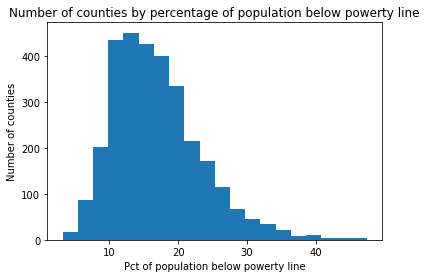

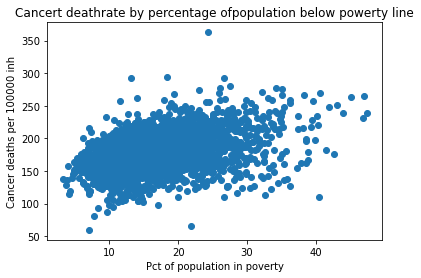

In [20]:
# plots
plt.hist(data.povertypercent,bins=20)
plt.title("Number of counties by percentage of population below powerty line")
plt.xlabel("Pct of population below powerty line")
plt.ylabel("Number of counties")
plt.show()
plt.scatter(data.povertypercent,data.target_deathrate)
plt.title("Cancert deathrate by percentage ofpopulation below powerty line")
plt.xlabel("Pct of population in poverty")
plt.ylabel("Cancer deaths per 100000 inh")
plt.show()

In [35]:
## Difference means

stats.levene(poverty_categories["five"],poverty_categories["fifteen"]
             ,poverty_categories["twenty"],poverty_categories["above"])

LeveneResult(statistic=29.861396732088522, pvalue=5.06421609886636e-19)

In [36]:
## unequal variance - kstest

stats.kstest(poverty_categories["five"],poverty_categories["fifteen"]
             ,poverty_categories["twenty"],poverty_categories["above"])

KstestResult(statistic=0.5808605341246291, pvalue=2.8343506071393243e-05)

In [38]:
## post hoc

t_results = {}

for category in poverty_categories:
    for category1 in poverty_categories:
        if category == category1:
            pass
        else:
            t_results[(category,category1)] = stats.ttest_ind(poverty_categories[category],poverty_categories[category1], equal_var=False)
            
t_results

{('five',
  'fifteen'): Ttest_indResult(statistic=-6.244020026892515, pvalue=1.6687465406059057e-05),
 ('five',
  'twenty'): Ttest_indResult(statistic=-10.163581094073367, pvalue=3.4866123497703165e-08),
 ('five',
  'above'): Ttest_indResult(statistic=-12.746314239640439, pvalue=6.12950170710276e-10),
 ('fifteen',
  'five'): Ttest_indResult(statistic=6.244020026892515, pvalue=1.6687465406059057e-05),
 ('fifteen',
  'twenty'): Ttest_indResult(statistic=-15.142544902139852, pvalue=6.206127847172289e-49),
 ('fifteen',
  'above'): Ttest_indResult(statistic=-20.752940514431902, pvalue=2.153214225886473e-83),
 ('twenty',
  'five'): Ttest_indResult(statistic=10.163581094073367, pvalue=3.4866123497703165e-08),
 ('twenty',
  'fifteen'): Ttest_indResult(statistic=15.142544902139852, pvalue=6.206127847172289e-49),
 ('twenty',
  'above'): Ttest_indResult(statistic=-8.112778113535024, pvalue=1.0189010332192682e-15),
 ('above',
  'five'): Ttest_indResult(statistic=12.746314239640439, pvalue=6.129501

In [21]:
# the same, but by median income
data.medincome.describe()

count      3047.000000
mean      47063.281917
std       12040.090836
min       22640.000000
25%       38882.500000
50%       45207.000000
75%       52492.000000
max      125635.000000
Name: medincome, dtype: float64

In [89]:
median_categories = {}
median_categories["below 38k"] = data[data.medincome <= 38000]
median_categories["below 45k"] = data[(data.medincome >38000)&(data.medincome<=45000)]
median_categories["below 60k"] = data[(data.medincome > 45000)& (data.medincome<=60000)]
median_categories["above"] = data[data.medincome>60000]

In [91]:
for category in median_categories:
    result = median_categories[category].target_deathrate.mean()
    print(f"Mean death rate per 100000 inhabitants for median income category {category} is {result}")

Mean death rate per 100000 inhabitants for median income category below 38k is 196.7868343195266
Mean death rate per 100000 inhabitants for median income category below 45k is 182.8380315917374
Mean death rate per 100000 inhabitants for median income category below 60k is 171.00266889074226
Mean death rate per 100000 inhabitants for median income category above is 160.0389684813754


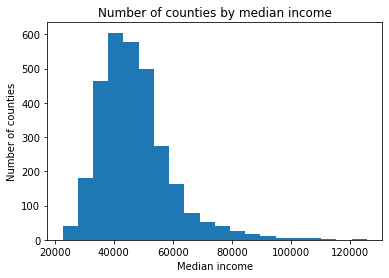

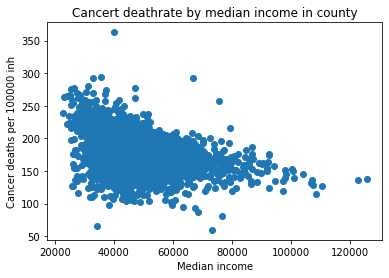

In [30]:
# plots
plt.hist(data.medincome,bins=20)
plt.title("Number of counties by median income")
plt.xlabel("Median income")
plt.ylabel("Number of counties")
plt.show()
plt.scatter(data.medincome,data.target_deathrate)
plt.title("Cancert deathrate by median income in county")
plt.xlabel("Median income")
plt.ylabel("Cancer deaths per 100000 inh")
plt.show()

In [29]:
# checking variance 
stats.levene(median_categories["below 38k"],median_categories["below 45k"]
             ,median_categories["above"],median_categories["below 60k"])

LeveneResult(statistic=25.56675559803035, pvalue=2.487600647327719e-16)

In [31]:
# kstest for unequal variances
stats.kstest(median_categories["below 38k"],median_categories["below 45k"]
             ,median_categories["above"],median_categories["below 60k"])

KstestResult(statistic=0.2343802799686527, pvalue=1.9984014443252818e-15)

In [32]:
t_results = {}

for category in median_categories:
    for category1 in median_categories:
        if category == category1:
            pass
        else:
            t_results[(category,category1)] = stats.ttest_ind(median_categories[category],median_categories[category1], equal_var=False)
            
t_results

{('below 38k',
  'below 45k'): Ttest_indResult(statistic=9.479756773677975, pvalue=1.1430511477629795e-20),
 ('below 38k',
  'below 60k'): Ttest_indResult(statistic=19.383987207708095, pvalue=5.984337109411471e-72),
 ('below 38k',
  'above'): Ttest_indResult(statistic=21.395839863636677, pvalue=4.7493776322350666e-82),
 ('below 45k',
  'below 38k'): Ttest_indResult(statistic=-9.479756773677975, pvalue=1.1430511477629795e-20),
 ('below 45k',
  'below 60k'): Ttest_indResult(statistic=10.88306072626331, pvalue=1.1971584318976725e-26),
 ('below 45k',
  'above'): Ttest_indResult(statistic=14.830949326578002, pvalue=1.5380050347118455e-43),
 ('below 60k',
  'below 38k'): Ttest_indResult(statistic=-19.383987207708095, pvalue=5.984337109411471e-72),
 ('below 60k',
  'below 45k'): Ttest_indResult(statistic=-10.88306072626331, pvalue=1.1971584318976725e-26),
 ('below 60k',
  'above'): Ttest_indResult(statistic=7.816385902564969, pvalue=2.9119785224988583e-14),
 ('above',
  'below 38k'): Ttest_in

In [90]:
# mean incidence rates per income groups
for category in median_categories:
    result = median_categories[category].incidencerate.mean()
    print(f"Mean incidence rate per 100000 inhabitants for category {category} is {result}")

Mean incidence rate per 100000 inhabitants for category below 38k is 445.04800039393484
Mean incidence rate per 100000 inhabitants for category below 45k is 449.1576903956267
Mean incidence rate per 100000 inhabitants for category below 60k is 449.81006644862373
Mean incidence rate per 100000 inhabitants for category above is 447.1142802830942


In [92]:
# ks test for mean differences
stats.kstest(median_categories["below 38k"].incidencerate,median_categories["below 45k"].incidencerate
             ,median_categories["above"].incidencerate,median_categories["below 60k"].incidencerate)

KstestResult(statistic=0.06467714452105516, pvalue=0.08475712223747345)

Interestingly, mean income in county does not directly affect cancer incidence rates. Let's check case/death ratio


In [93]:
# mean death/incident ratio
for category in median_categories:
    result = median_categories[category].target_deathrate.mean() / median_categories[category].incidencerate.mean()
    print(f"Mean ratio for category {category} is {result}")

Mean ratio for category below 38k is 0.44216991008911505
Mean ratio for category below 45k is 0.40706868768224846
Mean ratio for category below 60k is 0.38016638942933434
Mean ratio for category above is 0.3579375017502133


In [95]:
# as it is clearly different, let's run ttests straight away
t_results = {}

for category in median_categories:
    for category1 in median_categories:
        if category == category1:
            pass
        else:
            t_results[(category,category1)] = stats.ttest_ind(median_categories[category].incidencerate/median_categories[category].target_deathrate,median_categories[category1].incidencerate/median_categories[category1].target_deathrate, equal_var=False)
            
t_results

{('below 38k',
  'below 45k'): Ttest_indResult(statistic=-11.625169961458287, pvalue=5.962732265221404e-30),
 ('below 38k',
  'below 60k'): Ttest_indResult(statistic=-23.45956247144216, pvalue=4.4608147757656337e-104),
 ('below 38k',
  'above'): Ttest_indResult(statistic=-22.08350916608537, pvalue=1.000268089905324e-78),
 ('below 45k',
  'below 38k'): Ttest_indResult(statistic=11.625169961458287, pvalue=5.962732265221404e-30),
 ('below 45k',
  'below 60k'): Ttest_indResult(statistic=-11.165769452684929, pvalue=4.893205251147535e-28),
 ('below 45k',
  'above'): Ttest_indResult(statistic=-14.215190727110143, pvalue=1.917308070995933e-39),
 ('below 60k',
  'below 38k'): Ttest_indResult(statistic=23.45956247144216, pvalue=4.4608147757656337e-104),
 ('below 60k',
  'below 45k'): Ttest_indResult(statistic=11.165769452684929, pvalue=4.893205251147535e-28),
 ('below 60k',
  'above'): Ttest_indResult(statistic=-7.401192849628535, pvalue=5.614494039988118e-13),
 ('above',
  'below 38k'): Ttest_i

#### Statistical tests imply that there is a significant difference in cancer deathrates between counties with lower and hihger income and poverty percentage. Suprisingly, the incidence rate is not different between income groups. The real difference here is tied to healthcare access, as couties with lower median income have higher death/incident ratio. Further analysis will show how these numbers are tied to healthcare insurance provider

## Now let's look into statistics concerning healthcare provider

In [55]:
## We'll take into account the income data 
data_healthcare = data[["target_deathrate","pctprivatecoverage", 'pctprivatecoveragealone', 'pctempprivcoverage',
       'pctpubliccoverage', 'pctpubliccoveragealone',"medincome"]]
# creating variable dividing counties in four groups by median income
data_healthcare["income"] = 0
for x in range(len(data_healthcare.medincome)):
    if data_healthcare.medincome[x]<=35000:
        data_healthcare["income"][x] = "low"
    elif data_healthcare.medincome[x]>35000 and data_healthcare.medincome[x]<=45000:
        data_healthcare["income"][x] = "med_low"
    elif data_healthcare.medincome[x]>45000 and data_healthcare.medincome[x]<=60000:
        data_healthcare["income"][x] = "med_high"
    elif data_healthcare.medincome[x]>60000:
        data_healthcare["income"][x] = "high"



<ipython-input-55-46888051a1f5>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_healthcare["income"] = 0
<ipython-input-55-46888051a1f5>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_healthcare["income"][x] = "high"
C:\Users\szklarnia\anaconda3\lib\site-packages\pandas\core\indexing.py:671: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(in

In [59]:
#mean percent of insured by provider per income categories
data_healthcare.groupby("income").mean()

,target_deathrate,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,medincome
income,,,,,,,
high,160.038968,76.316905,62.398182,53.888825,25.238109,12.053868,71466.128940
low,201.006349,49.265079,35.429739,30.051587,45.839153,27.871693,31817.841270
med_high,171.002669,69.549291,53.070674,44.922602,33.272644,16.519766,51093.156797
med_low,185.123283,60.163336,43.627915,37.017217,39.636574,21.476360,40296.433541


In [60]:
# looking into data for low income counties
low = data_healthcare[data_healthcare.income == "low"]


,target_deathrate,pctprivatecoverage,pctprivatecoveragealone,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,medincome,income
25,196.3,56.1,41.9,38.9,43.4,25.4,33817,low
27,194.0,63.3,48.2,44.4,39.0,21.7,34887,low
28,226.5,52.4,36.5,35.1,46.0,25.2,32162,low
29,212.9,48.7,33.7,32.6,52.0,32.5,32961,low
32,209.9,61.3,NaN,41.2,39.0,18.8,32705,low
...,...,...,...,...,...,...,...,...
2843,218.3,61.0,46.6,40.0,41.6,23.6,33640,low
2844,217.0,49.6,32.9,26.7,52.8,31.1,30744,low
2845,221.7,51.1,34.6,28.9,48.1,28.8,30860,low
2863,171.5,69.1,56.3,43.6,32.7,19.5,34395,low


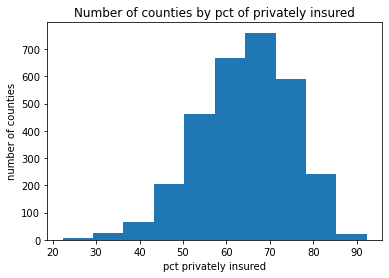

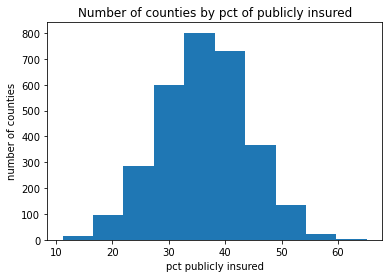

In [77]:
# some plots
#histogram by percentage of insurance provider
plt.hist(data.pctprivatecoverage)
plt.title("Number of counties by pct of privately insured")
plt.xlabel("pct privately insured")
plt.ylabel("number of counties")
plt.show()
plt.hist(data.pctpubliccoverage)
plt.title("Number of counties by pct of publicly insured")
plt.xlabel("pct publicly insured")
plt.ylabel("number of counties")
plt.show()

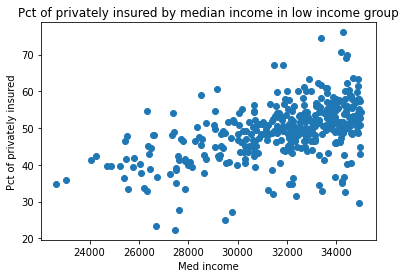

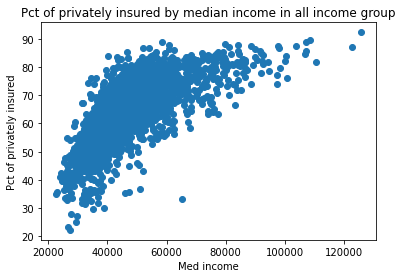

In [75]:
# percentage of privately insured by income
plt.scatter(low.medincome,low.pctprivatecoverage)
plt.title("Pct of privately insured by median income in low income group")
plt.xlabel("Med income")
plt.ylabel("Pct of privately insured")
plt.show()
plt.scatter(data.medincome,data.pctprivatecoverage)
plt.title("Pct of privately insured by median income in all income group")
plt.xlabel("Med income")
plt.ylabel("Pct of privately insured")
plt.show()


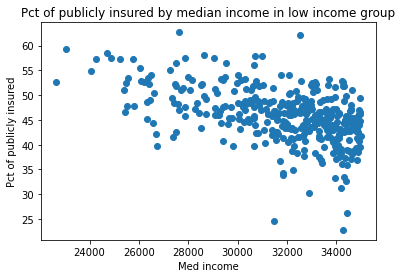

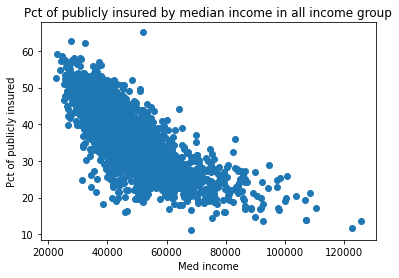

In [76]:
# percentage of publicly insured by income
plt.scatter(low.medincome,low.pctpubliccoverage)
plt.title("Pct of publicly insured by median income in low income group")
plt.xlabel("Med income")
plt.ylabel("Pct of publicly insured")
plt.show()
plt.scatter(data.medincome,data.pctpubliccoverage)
plt.title("Pct of publicly insured by median income in all income group")
plt.xlabel("Med income")
plt.ylabel("Pct of publicly insured")
plt.show()

Percentage of privately and publicly insured is heavily reliant from median income, something worth remembering when comparing cancer deathrates by healthcare provider

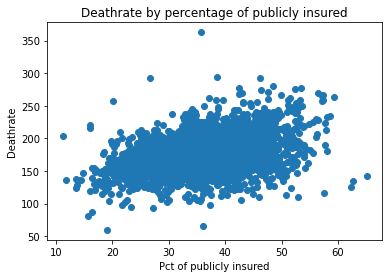

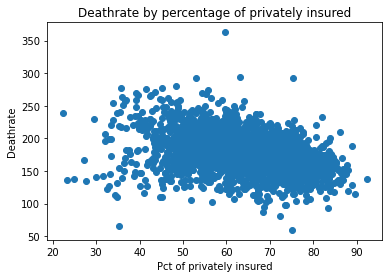

In [80]:
# cancer deathrate by number of publicly and privately insured
plt.scatter(data.pctpubliccoverage,data.target_deathrate)
plt.title("Deathrate by percentage of publicly insured")
plt.xlabel("Pct of publicly insured")
plt.ylabel("Deathrate")
plt.show()
plt.scatter(data.pctprivatecoverage,data.target_deathrate)
plt.title("Deathrate by percentage of privately insured")
plt.xlabel("Pct of privately insured")
plt.ylabel("Deathrate")
plt.show()

There seems to be clearly visible correlation between pct of privately and publicly insured and cancer deathrate. Let's run a tt
est between low and high percentage of privately and publicly insured to make sure that the effect is statisticly important

In [96]:
#ttest
stats.ttest_ind(data[data.pctpubliccoverage < 20].target_deathrate,data[data.pctpubliccoverage > 45].target_deathrate)

Ttest_indResult(statistic=-11.915712259754685, pvalue=1.260071102590432e-28)

There is clear difference between pct of publicly insured and death rate. Now let's look how public insurance is tied to quality of healthcare provided, as incidence/death rate.

In [97]:
#creating categories for pct of publicly insured
public_categories = {}

public_categories["low"] = data[data.pctpubliccoverage < 20]
public_categories["med_low"] = data[(data.pctpubliccoverage >= 20) & (data.pctpubliccoverage < 35)]
public_categories["med_high"] = data[(data.pctpubliccoverage >= 35) & (data.pctpubliccoverage < 50)]
public_categories["high"] = data[data.pctpubliccoverage > 50]


In [98]:
# incidence/death rate
for category in public_categories:
    result = public_categories[category].target_deathrate.mean() / public_categories[category].incidencerate.mean()
    print(f"Mean ratio for category {category} is {result}")

Mean ratio for category low is 0.346626114688644
Mean ratio for category med_low is 0.3779241643167843
Mean ratio for category med_high is 0.41254774100937774
Mean ratio for category high is 0.44140049123887676


These numbers can be seen as a proof of the fact that public isurance provides lower quality healthcare, thus private insurance is better than public. These conclusions are premature. We must take into account, that higher percentage of publicly insured is very much tied to median income in county. In USA public insurance is not universal but rather a for of federal help to poorer citizens. These numbers are very similar to the numbers seen in comparing incidence/death ratio between median income groups. People insured publicly certainly dont have additional money they could spend on higher quality treatments and this explanation seems more probable to me. Further analysis of concrete cases, not on the level of county could prove useful in drawing more detailed conclusions

### Analyses conducted above show many inequalities in access to healthcare and in possibility of getting cancer between groups in united states. Black citizens are more likely to get cancer and to die from int than the rest of population. We can also see difference in acces to quality healthcare between richer and poorer counties and between privately and publicly insured. This data is a valuable resource to anyone willing to tackle these inequalities

# OLS regression

### Creation and evaluation of models

In [214]:
data.isna().sum()


avganncount                   0
avgdeathsperyear              0
target_deathrate              0
incidencerate                 0
medincome                     0
popest2015                    0
povertypercent                0
studypercap                   0
binnedinc                     0
medianage                     0
medianagemale                 0
medianagefemale               0
geography                     0
avghouseholdsize              0
percentmarried                0
pctnohs18_24                  0
pcths18_24                    0
pctsomecol18_24            2285
pctbachdeg18_24               0
pcths25_over                  0
pctbachdeg25_over             0
pctemployed16_over          152
pctunemployed16_over          0
pctprivatecoverage            0
pctprivatecoveragealone     609
pctempprivcoverage            0
pctpubliccoverage             0
pctpubliccoveragealone        0
pctwhite                      0
pctblack                      0
pctasian                      0
pctother

In [101]:
#removing columns with lots of nans and non numerical columns
data = data.drop(["pctsomecol18_24","pctemployed16_over","pctprivatecoveragealone","binnedinc","geography"],axis=1)

In [102]:
data

,avganncount,avgdeathsperyear,target_deathrate,incidencerate,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,...,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,1397.000000,469,164.9,489.800000,61898,260131,11.2,499.748204,39.3,36.9,...,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,173.000000,70,161.3,411.600000,48127,43269,18.6,23.111234,33.0,32.2,...,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,102.000000,50,174.7,349.700000,49348,21026,14.6,47.560164,45.0,44.0,...,63.7,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,427.000000,202,194.8,430.400000,44243,75882,17.1,342.637253,42.8,42.2,...,58.4,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,57.000000,26,144.4,350.100000,49955,10321,12.5,0.000000,48.3,47.8,...,61.6,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,15,149.6,453.549422,46961,6343,12.4,0.000000,44.2,41.1,...,78.3,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,1962.667684,43,150.1,453.549422,48609,37118,18.8,377.175494,30.4,29.3,...,64.5,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,1962.667684,46,153.9,453.549422,51144,34536,15.0,1968.959926,30.9,30.5,...,62.0,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,1962.667684,52,175.0,453.549422,50745,25609,13.3,0.000000,39.0,36.9,...,75.9,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [103]:
# preparing data, first try, all variables
X = data.iloc[:,4:]
y = data.target_deathrate
X

,medincome,popest2015,povertypercent,studypercap,medianage,medianagemale,medianagefemale,avghouseholdsize,percentmarried,pctnohs18_24,...,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds,birthrate
0,61898,260131,11.2,499.748204,39.3,36.9,41.7,2.54,52.5,11.5,...,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076,6.118831
1,48127,43269,18.6,23.111234,33.0,32.2,33.7,2.34,44.5,6.1,...,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500,4.333096
2,49348,21026,14.6,47.560164,45.0,44.0,45.8,2.62,54.2,24.0,...,63.7,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868,3.729488
3,44243,75882,17.1,342.637253,42.8,42.2,43.4,2.52,52.7,20.2,...,58.4,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514,4.603841
4,49955,10321,12.5,0.000000,48.3,47.8,48.9,2.34,57.8,14.9,...,61.6,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460,6.796657
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,46961,6343,12.4,0.000000,44.2,41.1,48.8,2.08,51.0,20.9,...,78.3,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830,7.773512
3043,48609,37118,18.8,377.175494,30.4,29.3,31.4,2.90,52.6,26.7,...,64.5,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937,8.186470
3044,51144,34536,15.0,1968.959926,30.9,30.5,31.2,3.04,54.8,19.7,...,62.0,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949,7.809192
3045,50745,25609,13.3,0.000000,39.0,36.9,40.5,2.56,58.8,10.9,...,75.9,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232,7.582938


In [104]:
# test train split

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

115     262.1
626     214.4
692     187.3
1075    200.9
653     151.9
        ...  
412     158.6
885     120.1
1613    187.1
2097    163.8
1427    157.6
Name: target_deathrate, Length: 587, dtype: float64

In [100]:
# creating pipelines and param grids

pipelines =[make_pipeline(PolynomialFeatures(),StandardScaler(),linear_model.Ridge()),
            make_pipeline(PolynomialFeatures(),MinMaxScaler(),linear_model.Ridge()),
            make_pipeline(PolynomialFeatures(),StandardScaler(),linear_model.Lasso()),
            make_pipeline(PolynomialFeatures(),MinMaxScaler(),linear_model.Lasso()),
            make_pipeline(PolynomialFeatures(),StandardScaler(),linear_model.ElasticNet()),
            make_pipeline(PolynomialFeatures(),MinMaxScaler(),linear_model.ElasticNet())]

param_grids = [{"polynomialfeatures__degree":[1,2],"ridge__alpha":[0.0001,0.001,0.01,0.1,1,10,100]},
              {"polynomialfeatures__degree":[1,2],"ridge__alpha":[0.0001,0.001,0.01,0.1,1,10,100]},
              {"polynomialfeatures__degree":[1,2],"lasso__alpha":[0.0001,0.001,0.01,0.1,1,10,100]},
              {"polynomialfeatures__degree":[1,2],"lasso__alpha":[0.0001,0.001,0.01,0.1,1,10,100]},
              {"polynomialfeatures__degree":[1,2],"elasticnet__alpha":[0.0001,0.001,0.01,0.1,1,10,100],"elasticnet__l1_ratio":[0.1,0.3,0.5,0.7,0.9]},
              {"polynomialfeatures__degree":[1,2],"elasticnet__alpha":[0.0001,0.001,0.01,0.1,1,10,100],"elasticnet__l1_ratio":[0.1,0.3,0.5,0.7,0.9]}]

In [108]:
# Evaluation of models using GridSearchCV
# Creating grids
warnings.filterwarnings("ignore")
best_score = 0
best_model = np.NaN

for i in range(len(pipelines)):
    grid = GridSearchCV(pipelines[i],
                       param_grid=param_grids[i],
                       cv=5,
                       refit=True,
                       verbose=1,
                       n_jobs = 3)
    grid.fit(X_train,y_train)
    scr = grid.score(X_test,y_test)
    if scr > best_score:
        best_score = scr
        best_model = grid.best_params_
        
print(f"Best model is {best_model} with R2 score: {best_score}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    5.7s finished


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  65 out of  70 | elapsed:    4.2s remaining:    0.2s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    4.4s finished


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  82 tasks      | elapsed:   11.3s
[Parallel(n_jobs=3)]: Done 236 tasks      | elapsed:   28.7s
[Parallel(n_jobs=3)]: Done 350 out of 350 | elapsed:   30.4s finished


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  82 tasks      | elapsed:   10.6s
[Parallel(n_jobs=3)]: Done 350 out of 350 | elapsed:   21.5s finished


Best model is {'polynomialfeatures__degree': 2, 'ridge__alpha': 1} with R2 score: 0.4927002833132069


Second run - column selection by heart

In [110]:
data.columns

Index(['avganncount', 'avgdeathsperyear', 'target_deathrate', 'incidencerate',
       'medincome', 'popest2015', 'povertypercent', 'studypercap', 'medianage',
       'medianagemale', 'medianagefemale', 'avghouseholdsize',
       'percentmarried', 'pctnohs18_24', 'pcths18_24', 'pctbachdeg18_24',
       'pcths25_over', 'pctbachdeg25_over', 'pctunemployed16_over',
       'pctprivatecoverage', 'pctempprivcoverage', 'pctpubliccoverage',
       'pctpubliccoveragealone', 'pctwhite', 'pctblack', 'pctasian',
       'pctotherrace', 'pctmarriedhouseholds', 'birthrate'],
      dtype='object')

In [112]:
X1 = data[["medincome","popest2015","povertypercent","medianage","medianagemale","medianagemale","avghouseholdsize","percentmarried",
          "pctprivatecoverage","pctempprivcoverage","pctpubliccoverage","pctblack","pctwhite","pctasian"]]
y1 = data.target_deathrate

In [113]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X,y,test_size=0.2)


In [115]:
warnings.filterwarnings("ignore")
best_score = 0
best_model = np.NaN

for i in range(len(pipelines)):
    grid = GridSearchCV(pipelines[i],
                       param_grid=param_grids[i],
                       cv=5,
                       refit=True,
                       verbose=1,
                       n_jobs = 3)
    grid.fit(X1_train,y1_train)
    scr = grid.score(X1_test,y1_test)
    if scr > best_score:
        best_score = scr
        best_model = grid.best_params_
        
print(f"Best model is {best_model} with R2 score: {best_score}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    0.8s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Done  65 out of  70 | elapsed:    5.2s remaining:    0.3s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    5.3s finished


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  65 out of  70 | elapsed:    3.7s remaining:    0.2s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    3.9s finished


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  82 tasks      | elapsed:   10.0s
[Parallel(n_jobs=3)]: Done 350 out of 350 | elapsed:   28.9s finished


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  82 tasks      | elapsed:   10.7s
[Parallel(n_jobs=3)]: Done 350 out of 350 | elapsed:   21.9s finished


Best model is {'polynomialfeatures__degree': 2, 'ridge__alpha': 1} with R2 score: 0.4585215378395767


Third run -- selection by correlation matrix hopefuls

In [118]:
corr = data.corr().target_deathrate

In [145]:
corrs = corr[(corr > 0.10) | (corr < -0.10)]

In [146]:
X=data[corrs.index]
X = X.drop("target_deathrate",axis=1)

,avganncount,target_deathrate,incidencerate,medincome,popest2015,povertypercent,percentmarried,pcths18_24,pctbachdeg18_24,pcths25_over,...,pctunemployed16_over,pctprivatecoverage,pctempprivcoverage,pctpubliccoverage,pctpubliccoveragealone,pctwhite,pctblack,pctasian,pctotherrace,pctmarriedhouseholds
0,1397.000000,164.9,489.800000,61898,260131,11.2,52.5,39.5,6.9,23.2,...,8.0,75.1,41.6,32.9,14.0,81.780529,2.594728,4.821857,1.843479,52.856076
1,173.000000,161.3,411.600000,48127,43269,18.6,44.5,22.4,7.5,26.0,...,7.8,70.2,43.6,31.1,15.3,89.228509,0.969102,2.246233,3.741352,45.372500
2,102.000000,174.7,349.700000,49348,21026,14.6,54.2,36.6,9.5,29.0,...,7.0,63.7,34.9,42.1,21.1,90.922190,0.739673,0.465898,2.747358,54.444868
3,427.000000,194.8,430.400000,44243,75882,17.1,52.7,41.2,2.5,31.6,...,12.1,58.4,35.0,45.3,25.0,91.744686,0.782626,1.161359,1.362643,51.021514
4,57.000000,144.4,350.100000,49955,10321,12.5,57.8,43.0,2.0,33.4,...,4.8,61.6,35.1,44.0,22.7,94.104024,0.270192,0.665830,0.492135,54.027460
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3042,1962.667684,149.6,453.549422,46961,6343,12.4,51.0,27.9,8.4,32.2,...,4.3,78.3,44.6,31.7,13.2,90.280811,3.837754,0.327613,1.700468,51.063830
3043,1962.667684,150.1,453.549422,48609,37118,18.8,52.6,33.9,3.8,23.1,...,4.6,64.5,48.6,28.8,17.7,75.706245,2.326771,4.044920,14.130288,52.007937
3044,1962.667684,153.9,453.549422,51144,34536,15.0,54.8,44.5,2.5,23.0,...,6.4,62.0,47.8,26.6,16.8,87.961629,2.313188,1.316472,5.680705,55.153949
3045,1962.667684,175.0,453.549422,50745,25609,13.3,58.8,37.2,4.1,36.1,...,6.9,75.9,49.6,29.5,14.0,92.905681,1.176562,0.244632,2.131790,58.484232


In [147]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [148]:
warnings.filterwarnings("ignore")
best_score = 0
best_model = np.NaN

for i in range(len(pipelines)):
    grid = GridSearchCV(pipelines[i],
                       param_grid=param_grids[i],
                       cv=5,
                       refit=True,
                       verbose=1,
                       n_jobs = 3)
    grid.fit(X_train,y_train)
    scr = grid.score(X_test,y_test)
    if scr > best_score:
        best_score = scr
        best_model = grid.best_params_
        
print(f"Best model is {best_model} with R2 score: {best_score}")

Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    0.6s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    0.4s finished
[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Done  65 out of  70 | elapsed:    2.9s remaining:    0.1s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    2.9s finished


Fitting 5 folds for each of 14 candidates, totalling 70 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  65 out of  70 | elapsed:    2.3s remaining:    0.1s
[Parallel(n_jobs=3)]: Done  70 out of  70 | elapsed:    2.3s finished


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  82 tasks      | elapsed:    6.4s
[Parallel(n_jobs=3)]: Done 350 out of 350 | elapsed:   16.7s finished


Fitting 5 folds for each of 70 candidates, totalling 350 fits


[Parallel(n_jobs=3)]: Using backend LokyBackend with 3 concurrent workers.
[Parallel(n_jobs=3)]: Done  82 tasks      | elapsed:    6.3s
[Parallel(n_jobs=3)]: Done 350 out of 350 | elapsed:   12.8s finished


Best model is {'elasticnet__alpha': 0.001, 'elasticnet__l1_ratio': 0.5, 'polynomialfeatures__degree': 2} with R2 score: 0.5198257664564837


In [149]:
best_one = make_pipeline(PolynomialFeatures(2),StandardScaler(),linear_model.ElasticNet(alpha=.001,l1_ratio=0.5))
best_one.fit(X,y)

Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('standardscaler', StandardScaler()),
                ('elasticnet', ElasticNet(alpha=0.001))])

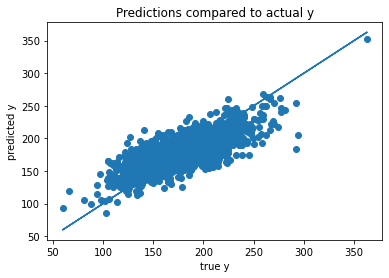

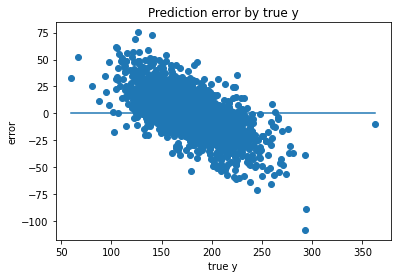

In [157]:
# plotting results

plt.scatter(y,best_one.predict(X),label="predicts")
plt.plot(y,y,label="y y reference")
plt.title("Predictions compared to actual y")
plt.xlabel("true y")
plt.ylabel("predicted y")
plt.show()


plt.scatter(y,best_one.predict(X)-y,label="predicts")
plt.plot(np.linspace(min(y),max(y)),np.zeros(50))
plt.title("Prediction error by true y")
plt.xlabel("true y")
plt.ylabel("error")
plt.show()

In [162]:
# other evaluating metrics
print(f"Root mean squared error of model: {np.sqrt(metrics.mean_squared_error(y,best_one.predict(X)))}")
print(f"Mean absolute error of model: {metrics.mean_absolute_error(y,best_one.predict(X))}")
print(f"Median absolute error of model: {metrics.median_absolute_error(y,best_one.predict(X))}")


Root mean squared error of model: 17.384362588052706
Mean absolute error of model: 13.004593869543243
Median absolute error of model: 9.923173503437937


#### Best model is overpredicting for lower y values and underpredicting for higher ones. Better result could be achieved by dividing target into categories and trying to predict them
